# Import Libraries

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Understanding the Dataset Structure

In [43]:
# Dataset paths
train_dir = '../dataset/train'
val_dir = '../dataset/validation'

In [44]:
# Function to count the number of images per category
def count_images_per_category(base_dir):
    categories = os.listdir(base_dir)
    data_distribution = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}
    return data_distribution

In [45]:
# Count data distribution for train and validation sets
train_distribution = count_images_per_category(train_dir)
val_distribution = count_images_per_category(val_dir)

In [46]:
# Create a dataframe for visualization
df_train = pd.DataFrame(train_distribution.items(), columns=['Category', 'Train Count'])
df_val = pd.DataFrame(val_distribution.items(), columns=['Category', 'Validation Count'])

In [47]:
# Merge train and validation counts
df_overall = pd.merge(df_train, df_val, on="Category")
print(df_overall)

                Category  Train Count  Validation Count
0      Chest Fly Machine          112                14
1               Dumbbell          112                14
2  Lat Pull Down Machine          112                14
3  Leg Extension Machine          112                14
4      Leg Press Machine          112                14
5     Seated Row Machine          112                14
6          Smith Machine          112                14
7              Treadmill          112                14


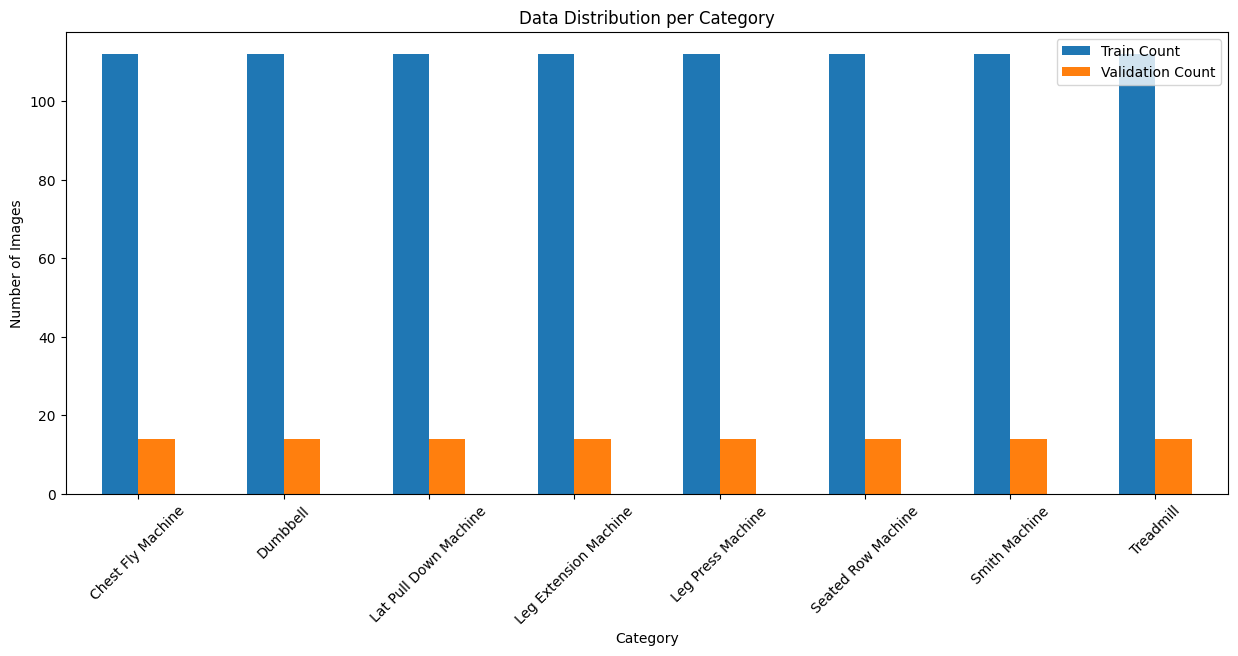

In [48]:
# Visualize the distribution
df_overall.plot(kind='bar', x='Category', figsize=(15, 6), title="Data Distribution per Category")
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- The dataset contains 8 categories with 112 images each for the train set and 14 images each for the validation set.
- The data distribution is balanced across all categories, ensuring no bias during training.

# Visualizing Sample Images

In [49]:
# Function to visualize sample images
def plot_sample_images(base_dir, categories, sample_count=3):
    for category in categories:
        path = os.path.join(base_dir, category)
        images = os.listdir(path)[:sample_count]
        fig, axes = plt.subplots(1, sample_count, figsize=(15, 5))
        fig.suptitle(f"Category: {category}", fontsize=14)
        for i, image in enumerate(images):
            img = tf.keras.utils.load_img(os.path.join(path, image))
            axes[i].imshow(img)
            axes[i].axis('off')
        plt.show()

Sample images from the train set:


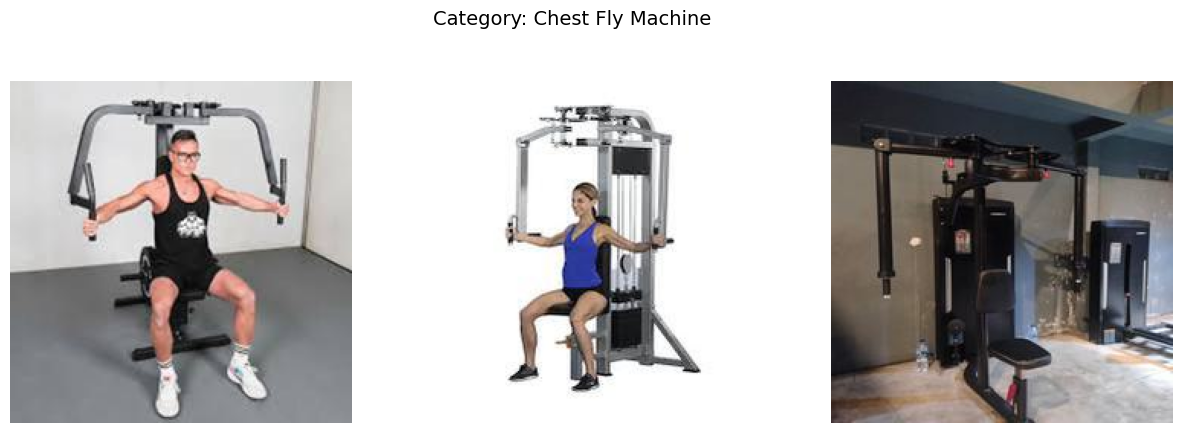

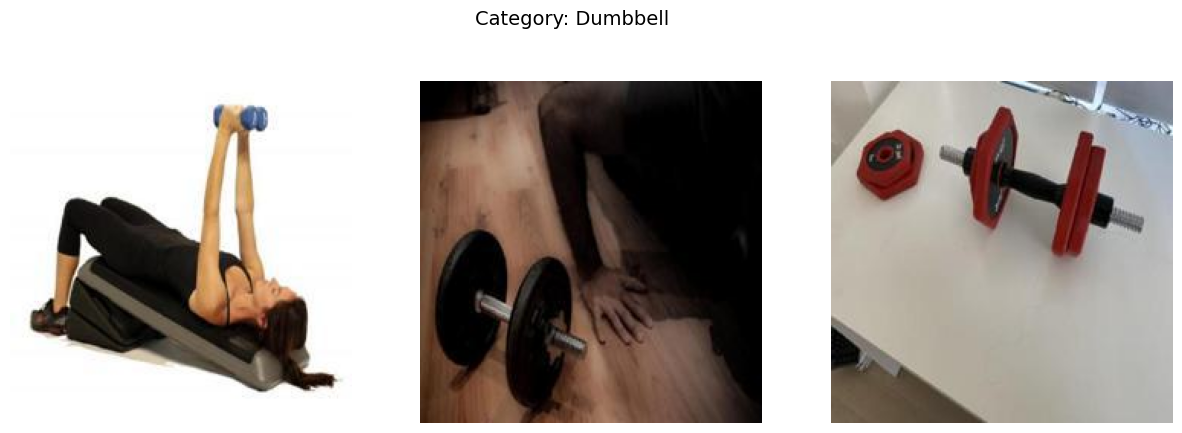

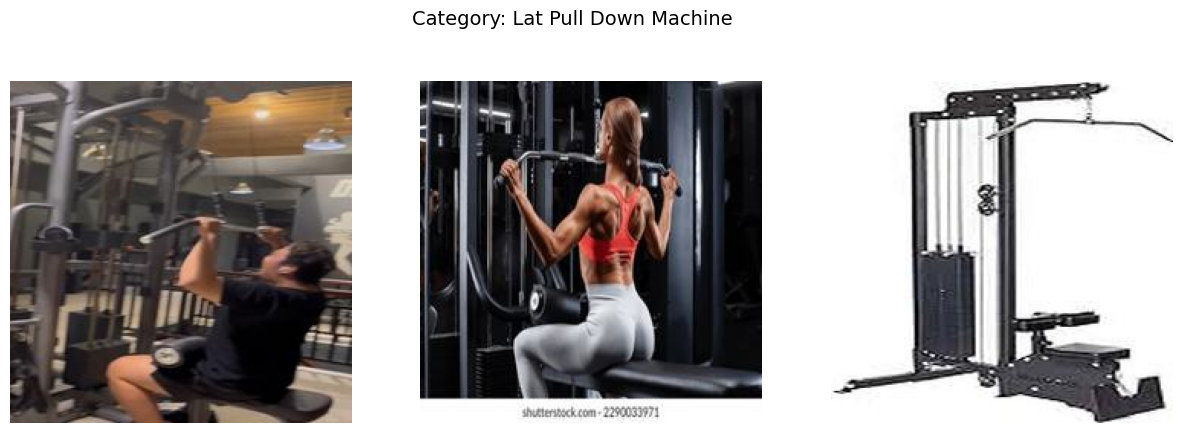

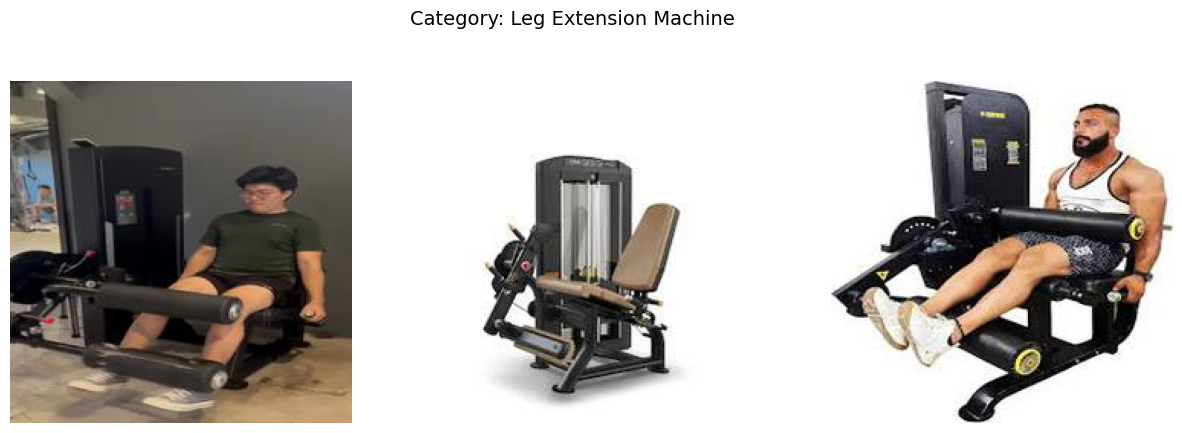

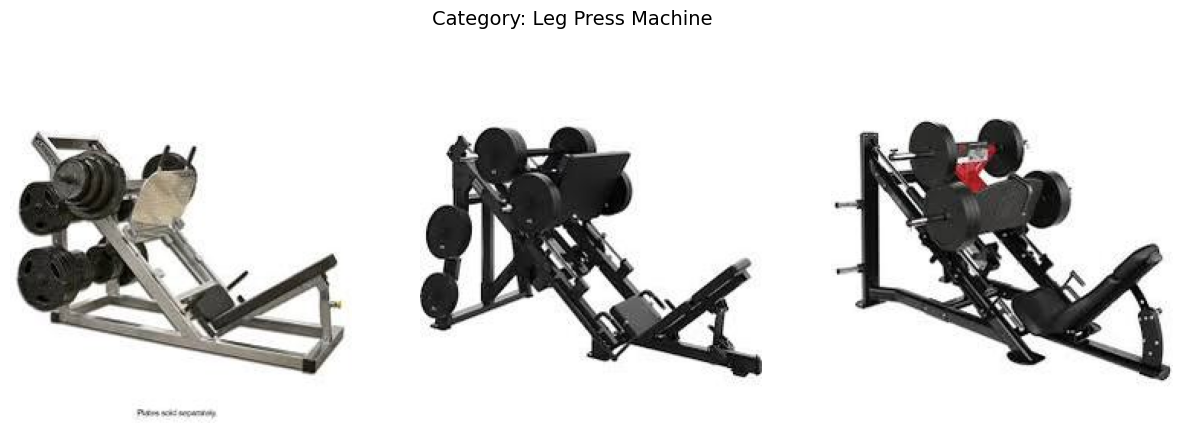

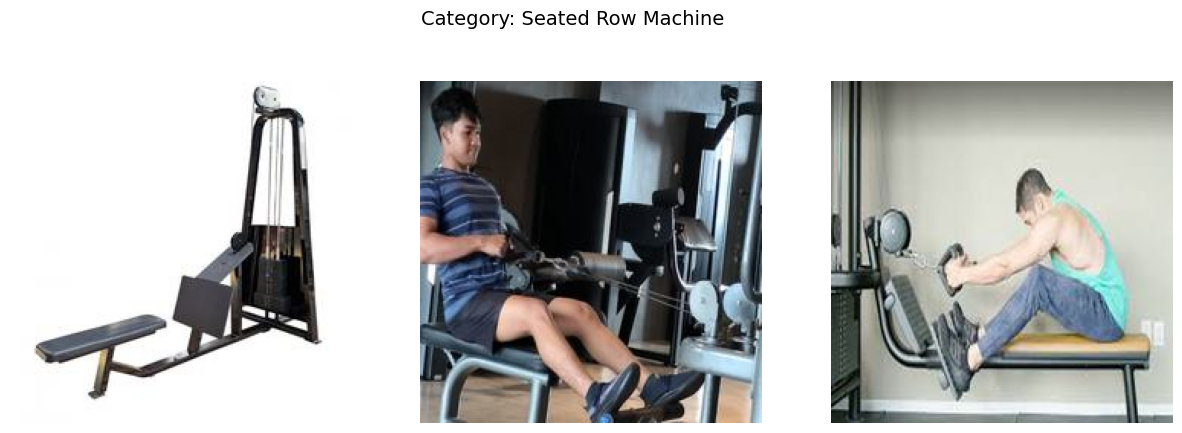

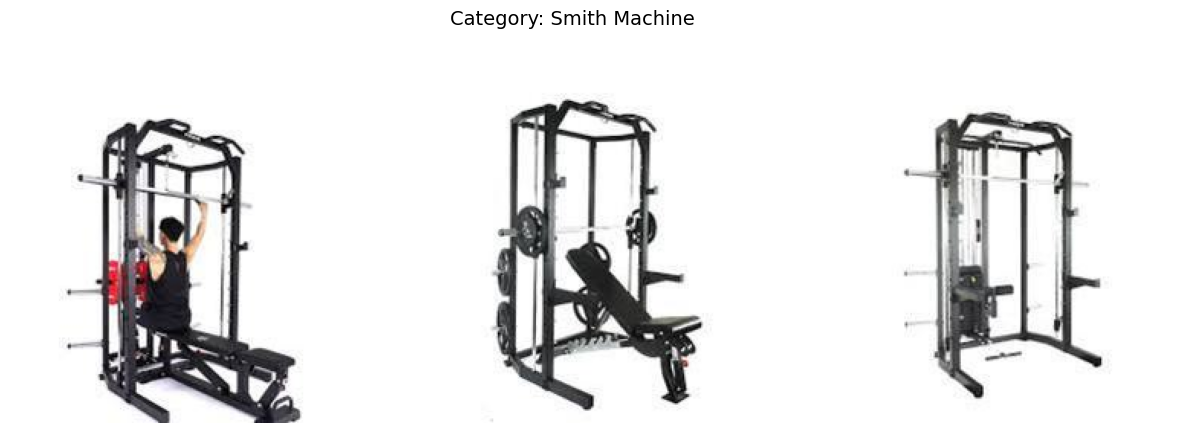

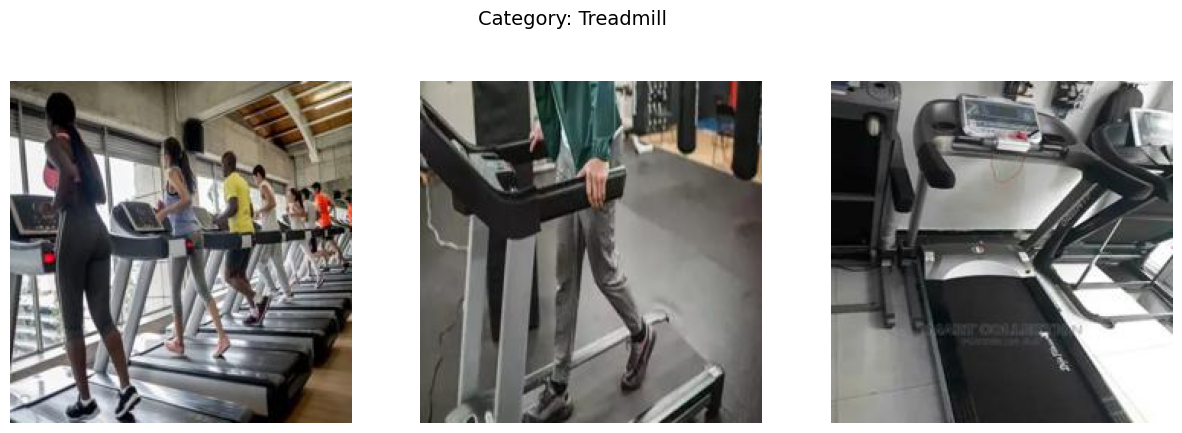

In [50]:
# Plot sample images for the train set
categories_train = os.listdir(train_dir)
print("Sample images from the train set:")
plot_sample_images(train_dir, categories_train)

Sample images from the validation set:


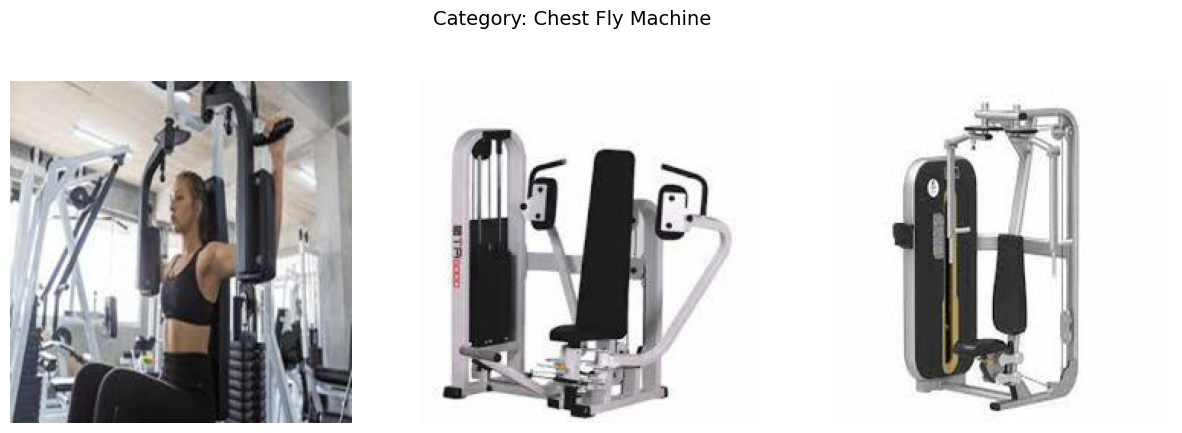

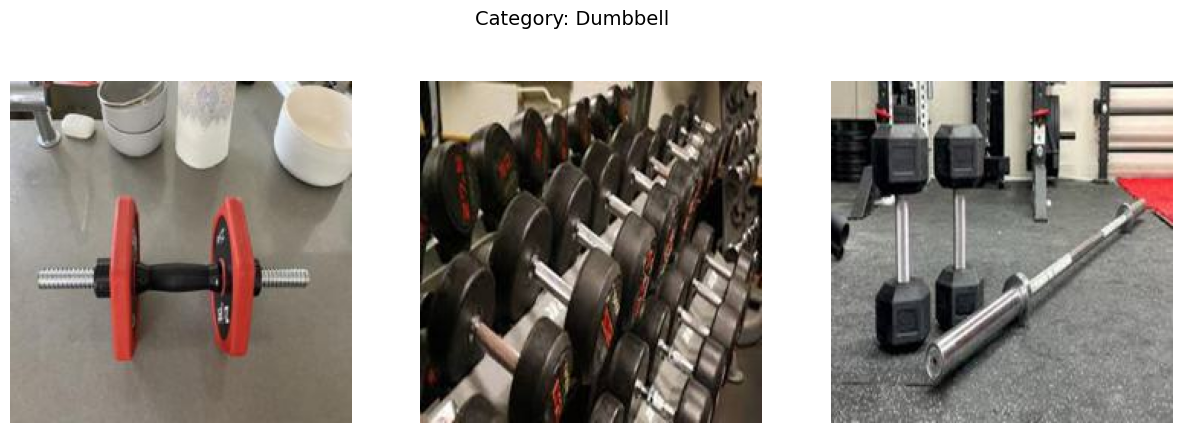

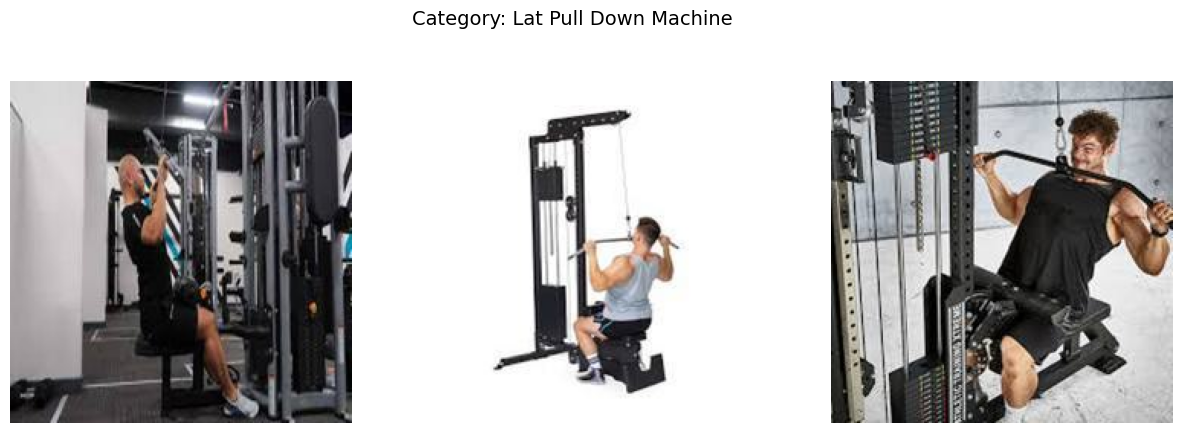

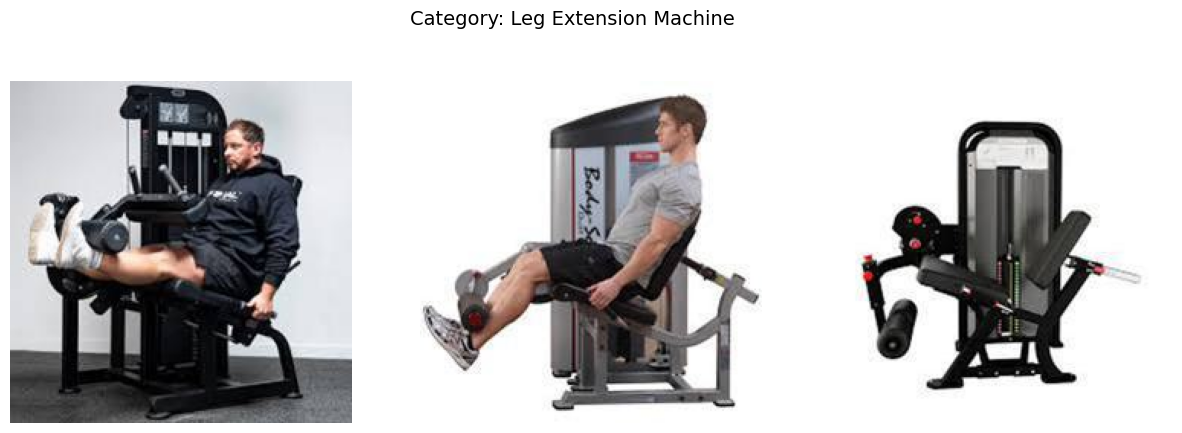

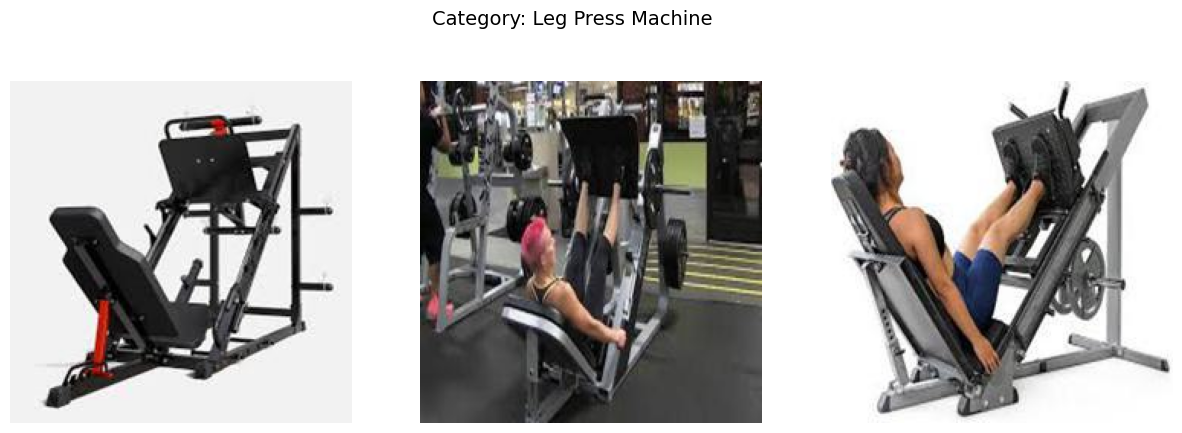

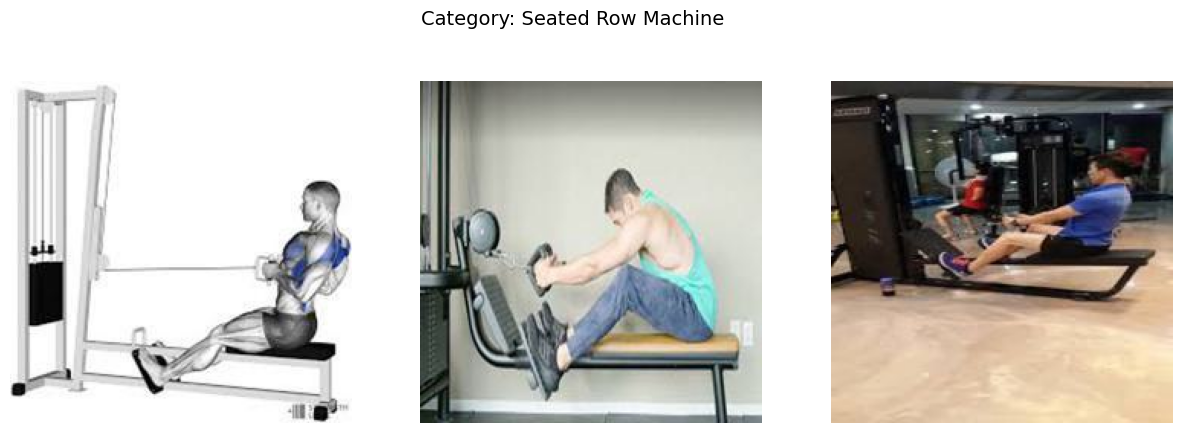

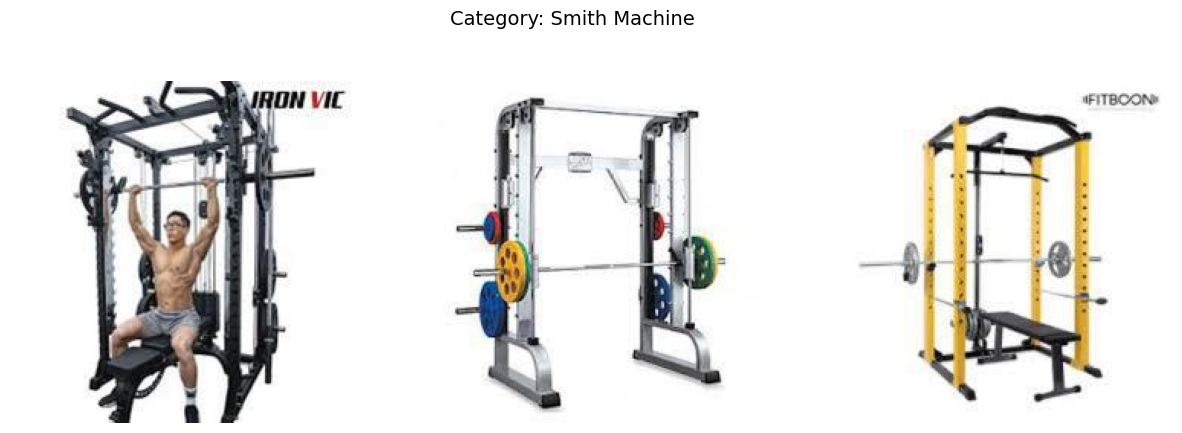

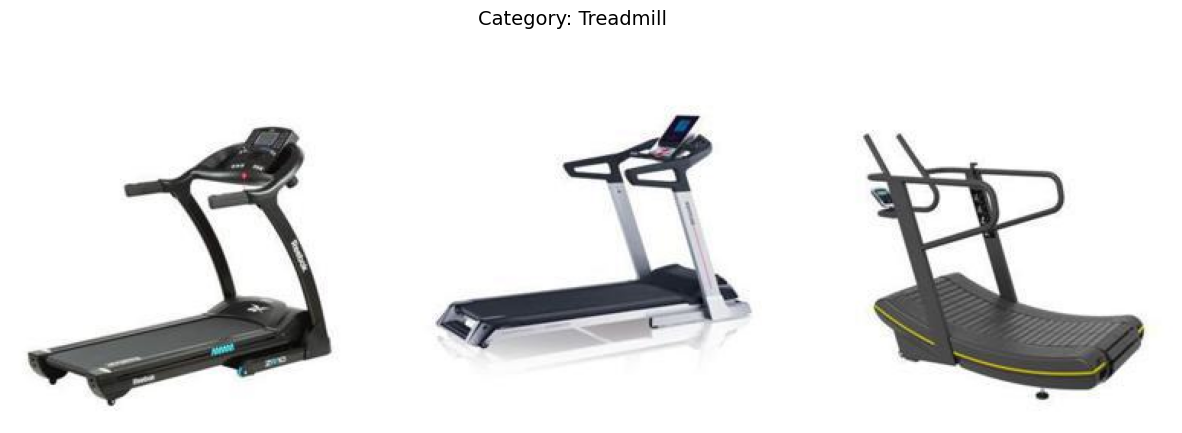

In [51]:
# Plot sample images for the validation set
categories_val = os.listdir(val_dir)
print("Sample images from the validation set:")
plot_sample_images(val_dir, categories_val)

**Insight:**
- The train and validation sets contain diverse, representative, and visually distinct images for each category.

# Analyzing Image Dimensions

In [52]:
# Analyze image dimensions
def analyze_image_dimensions(base_dir, categories):
    widths, heights = [], []
    for category in categories:
        path = os.path.join(base_dir, category)
        for img_file in os.listdir(path):
            img = tf.keras.utils.load_img(os.path.join(path, img_file))
            w, h = img.size
            widths.append(w)
            heights.append(h)
    return np.mean(widths), np.mean(heights), widths, heights

In [53]:
# Analyze dimensions in the train set
mean_width_train, mean_height_train, widths_train, heights_train = analyze_image_dimensions(train_dir, categories_train)
print(f"Average image dimensions (train set): {mean_width_train:.2f} x {mean_height_train:.2f}")

Average image dimensions (train set): 224.00 x 224.00


In [54]:
# Analyze dimensions in the validation set
mean_width_val, mean_height_val, widths_val, heights_val = analyze_image_dimensions(val_dir, os.listdir(val_dir))
print(f"Average image dimensions (validation set): {mean_width_val:.2f} x {mean_height_val:.2f}")

Average image dimensions (validation set): 224.00 x 224.00


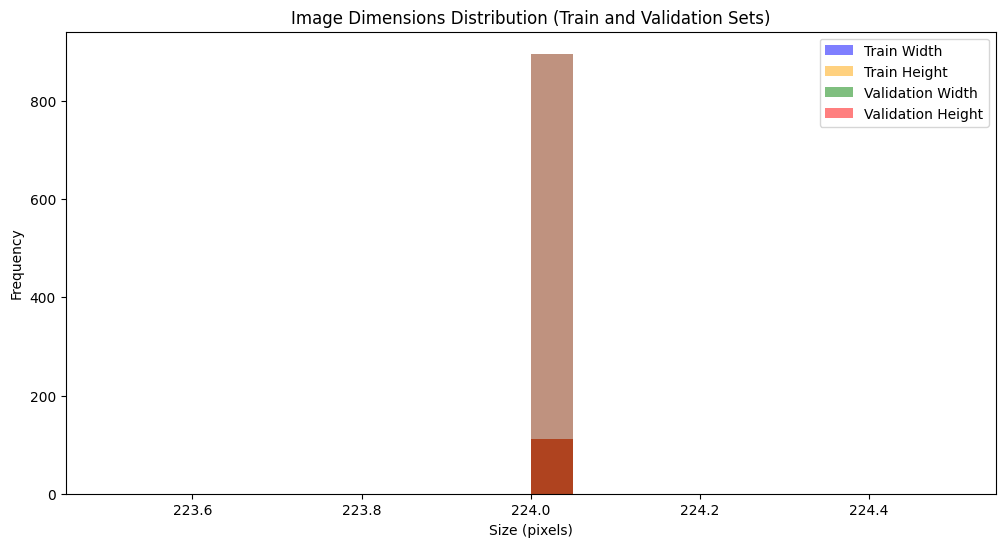

In [55]:
# Visualize image dimensions distribution for both train and validation sets
plt.figure(figsize=(12, 6))
plt.hist(widths_train, bins=20, alpha=0.5, label='Train Width', color='blue')
plt.hist(heights_train, bins=20, alpha=0.5, label='Train Height', color='orange')
plt.hist(widths_val, bins=20, alpha=0.5, label='Validation Width', color='green')
plt.hist(heights_val, bins=20, alpha=0.5, label='Validation Height', color='red')
plt.title("Image Dimensions Distribution (Train and Validation Sets)")
plt.xlabel("Size (pixels)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Insight:**
- Both train and validation sets have consistent image dimensions of 224x224 pixels for width and height.

# Detecting Corrupt Images

In [56]:
# Detect corrupt images
def detect_corrupt_images(base_dir, categories):
    corrupt_images = []
    for category in categories:
        path = os.path.join(base_dir, category)
        for img_file in os.listdir(path):
            try:
                img = tf.keras.utils.load_img(os.path.join(path, img_file))
            except:
                corrupt_images.append(os.path.join(category, img_file))
    return corrupt_images

In [57]:
# Detect corrupt images in train and validation sets
corrupt_train = detect_corrupt_images(train_dir, categories_train)
corrupt_val = detect_corrupt_images(val_dir, os.listdir(val_dir))

In [58]:
print(f"Corrupt images in the train set: {corrupt_train}")
print(f"Corrupt images in the validation set: {corrupt_val}")

Corrupt images in the train set: []
Corrupt images in the validation set: []


**Insight:**
- No corrupt images were detected in either the train or validation sets.
- This confirms the dataset is intact and free from unreadable or corrupted files, ensuring smooth processing during model training and validation.